# Initializing  pyspark

In [0]:
# !brew install wget
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz 
!tar -xvf  spark-2.4.4-bin-hadoop2.7.tgz
!pip install -q findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.4-bin-hadoop2.7"



In [0]:
import findspark
findspark.init()
from pyspark import SparkContext
sc =SparkContext()

In [0]:
%matplotlib inline
import pandas as pd 
import numpy
import matplotlib.pyplot as plt 


# Working  with twitter data


In [0]:
!pip install tweepy

In [0]:
import tweepy

consumer_key= 'AJ5oEDxPbYw3YYU8WfieiDWo3'
consumer_secret = 'NbBcRCfCskakakxkPxRxwpXyQnMLhBnEbs1bylPogFTNmdUOlT'

access_token = '248104828-flmyhcEitnAV9w4okjP1odxMpdpRg2lMlqrdxpl1'
access_token_secret = 'omavBDh6IGbSchvIwuHaaxskV65RvGBp4r5ZWqb9mj3KL'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

tweetsList1 = []
public_tweets = api.home_timeline()
for tweet in public_tweets:
    tweetsList.append(str(tweet.text))



Tweets are coming in multiple languages 

In [0]:
tweetsList

['Shuja-Ud-Daula - The strongest ally is he who turns the tide. #PanipatLook #Panipat #Dec6 \n\n@duttsanjay @kritisanon… https://t.co/DcvOg3jAGb',
 '🐕+👫 https://t.co/wMC7H7TnwF',
 'श्रद्धा में डूबे प्रधानमंत्री @narendramodi, बाबा नानक के दर पर माथा टेक की अरदास। https://t.co/YZZ9FtOAn0',
 'प्रधानमंत्री @narendramodi ने करतारपुर कॉरिडोर का उद्घाटन किया। https://t.co/BS5PLHkMnw',
 'Historic opening of Kartarpur corridor. https://t.co/rhFxRqvtQl',
 'Together, we must build a New India. https://t.co/Ns8Vtchzbe',
 'निर्णय को हार-जीत के तौर पर नहीं देखें। https://t.co/fC9e1uflii',
 'देश के लिए नया सवेरा। https://t.co/YZLdGAJotz',
 'Furthering social harmony. https://t.co/0SdddBMcrG',
 'अयोध्या पर निर्णय नया सवेरा लेकर आया। https://t.co/72cNzb37OF',
 'फैसला किसी की हार-जीत नहीं। https://t.co/CAInY4m7V9',
 'Shamsher Bahadur - Brave son of Bajirao and Mastani, and the cousin of Sadashiv Rao Bhau. #PanipatLook #Panipat… https://t.co/X98JCvfCb0',
 'It’s that time of year where people begin to ti

Translation using a regular library

In [0]:
# # def deEmojify(inputString):
# #     return inputString.encode('ascii', 'ignore').decode('ascii')
# pip install emoji
# import re
# import string
# import emoji

# # method to remoji
# def removeEmoji(str):
#     clear = ''
#     for val in str:
#         if(val not in emoji.UNICODE_EMOJI):
#             clear =clear+(val)
#     return clear

# # cleaning data from emoji
# clearList = []
# for val in tweetsList:
#       clearList.append(removeEmoji(val))

    

# Regular Translation 

In [0]:
!pip install google-cloud-translate==2.0.0

In [0]:
def googleTranslation(text):

  import os
  os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = "translate.json"

  from google.cloud import translate_v2 as translate
  translate_client = translate.Client()
  target = 'en'
  result = translate_client.translate(
      text, target_language=target)
  return result['translatedText']


  
  # print(u'Text: {}'.format(result['input']))
  # print(u'Translation: {}'.format(result['translatedText']))
  # print(u'Detected source language: {}'.format(
  #     result['detectedSourceLanguage']))

In [0]:

# text ='अभी भी चल 🤣😊 ही रहा है , बिस्तर पर लेटे लेटे'


Data from translated library

In [0]:
translated

['🐕+👫 https://t.co/wMC7H7TnwF',
 'Prime Minister @narendramodi immersed in reverence, Ardas of the forehead at the rate of Baba Nanak. https://t.co/YZZ9FtOAn0',
 'Prime Minister @narendramodi inaugurated the Kartarpur Corridor. https://t.co/BS5PLHkMnw',
 'Historic opening of Kartarpur corridor. https://t.co/rhFxRqvtQl',
 'Together, we must build a New India. https://t.co/Ns8Vtchzbe',
 'Don&#39;t see the decision as a win-win. https://t.co/fC9e1uflii',
 'A new dawn for the country. https://t.co/YZLdGAJotz',
 'Furthering social harmony. https://t.co/0SdddBMcrG',
 'The decision on Ayodhya brought a new dawn. https://t.co/72cNzb37OF',
 'The decision is not a victory or defeat of anyone. https://t.co/CAInY4m7V9',
 'Shamsher Bahadur - Brave son of Bajirao and Mastani, and the cousin of Sadashiv Rao Bhau. #PanipatLook # Panipat… https://t.co/X98JCvfCb0',
 'It’s that time of year where people begin to tip their servers under 10%, because they’re saving up to buy that hea… https://t.co/gAY33usE

# Start of sentimental data analysis with Pyspark

In [0]:
def percentage(a,b):
  return 100 *float(a)/float(b)

In [0]:
print('Enter the hastag term')
searchTerm = input()
numb = 2000
tweetsssss =tweepy.Cursor(api.search,q = searchTerm).items(numb)

Enter the hastag term
trump


In [0]:
# for tweet in tweetsssss:
#     print(str(tweet.text))

In [0]:
from textblob import TextBlob

In [0]:
def analyze(tweet):
  pos = neg = neu =pol = 0 
  analysis = TextBlob(tweet.text)
  pol += analysis.sentiment.polarity

  if (analysis.sentiment.polarity == 0):
    neu += 1
  elif (analysis.sentiment.polarity < 0):
      neg +=1
  elif analysis.sentiment.polarity > 0:
    pos += 1
  return [pos , neg , neu ,pol]

In [0]:
tw = sc.parallelize(tweetsssss,4)
tw.count()

In [0]:
data = tw.map(analyze)

In [0]:
data.collect()
# posCounted = data.map(lambda x: x[1]).reduceByKey(lambda x, y: x + y)

In [0]:
pos =  data.map(lambda x: (x[0])).reduce(lambda x,y:x+y)
neg =  data.map(lambda x: (x[1])).reduce(lambda x,y:x+y)
new =  data.map(lambda x: (x[2])).reduce(lambda x,y:x+y)
polarity =  data.map(lambda x: (x[3])).reduce(lambda x,y:x+y)

In [0]:
positive = percentage(pos,numb)
negative = percentage(neg,numb)
neutral = percentage(new,numb)
polarity = percentage(polarity,numb)
positive = format(positive,'.2f')
negative = format(negative,'.2f')
neutral = format(neutral, '.2f')

Tweets are positve


([<matplotlib.patches.Wedge at 0x7fd1c4fbd160>,
 [Text(-1.2912624524057517, -0.15047019308515508, 'Positve'),
  Text(0.2729476387420187, -1.0655982294022248, 'Negative'),
  Text(0.5874555296737299, 0.9299978498124377, 'Neutral')],
 [Text(-0.7946230476343088, -0.09259704189855694, '25.9%'),
  Text(0.14888053022291928, -0.581235397855759, '28.4%'),
  Text(0.32043028891294356, 0.5072715544431478, '45.7%')])

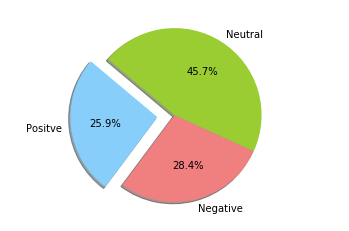

In [0]:
# if (polarity == 0):
#   print('Tweets are neutral')
# elif polarity > 0.00:
#   print('Tweets are positve')
# elif polarity < 0.00:
#   print('Tweets are negative')


colors = ['lightskyblue','lightcoral', 'yellowgreen', 'gold']
labels ='Positve','Negative', 'Neutral'
values = [positive,negative, neutral]
explode = (0.2, 0, 0) 
plt.axis('equal')

plt.pie(values, labels=labels, explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

In [0]:
# pip install SimpleCV

# Tool to read text from images and then translating it and making a audio file out of it

In [0]:
!pip install --upgrade google-cloud-vision
!pip install google-cloud-translate==2.0.0
!pip install --upgrade google-cloud-texttospeech
# pip install --upgrade google-cloud-translate


In [0]:
import io
import os
import html

# Imports the Google Cloud client libraries
from google.api_core.exceptions import AlreadyExists
from google.cloud import translate_v3beta1 as translate
from google.cloud import vision
from google.cloud import texttospeech

# !export GCLOUD_PROJECT= 869901988667

os.environ['GOOGLE_APPLICATION_CREDENTIALS']= './TranslationAPIEditior.json'

os.environ['GCLOUD_PROJECT'] = '869901988667'

PROJECT_ID = os.environ['GCLOUD_PROJECT']
# 869901988667  project number


def pic_to_text(infile):
    """Detects text in an image file

    ARGS
    infile: path to image file

    RETURNS
    String of text detected in image
    """

    # Instantiates a client
    client = vision.ImageAnnotatorClient()

    # Opens the input image file
    with io.open(infile, 'rb') as image_file:
        content = image_file.read()

    image = vision.types.Image(content=content)

    # For dense text, use document_text_detection
    # For less dense text, use text_detection
    response = client.document_text_detection(image=image)
    text = response.full_text_annotation.text

    return text

In [0]:
def create_glossary(languages, project_id, glossary_name, glossary_uri):
    """Creates a GCP glossary resource
    Assumes you've already manually uploaded a glossary to Cloud Storage

    ARGS
    languages: list of languages in the glossary
    project_id: GCP project id
    glossary_name: name you want to give this glossary resource
    glossary_uri: the uri of the glossary you uploaded to Cloud Storage

    RETURNS
    nothing
    """

    # Instantiates a client
    client = translate.TranslationServiceClient()

    # Designates the data center location that you want to use
    location = 'us-central1'

    # Set glossary resource name
    name = client.glossary_path(
        project_id,
        location,
        glossary_name)

    # Set language codes
    language_codes_set = translate.types.Glossary.LanguageCodesSet(
        language_codes=languages)

    gcs_source = translate.types.GcsSource(
        input_uri=glossary_uri)

    input_config = translate.types.GlossaryInputConfig(
        gcs_source=gcs_source)

    # Set glossary resource information
    glossary = translate.types.Glossary(
        name=name,
        language_codes_set=language_codes_set,
        input_config=input_config)

    parent = client.location_path(project_id, location)

    # Create glossary resource
    # Handle exception for case in which a glossary
    #  with glossary_name already exists
    try:
        operation = client.create_glossary(parent=parent, glossary=glossary)
        operation.result(timeout=90)
        print('Created glossary ' + glossary_name + '.')
    except AlreadyExists:
        print('The glossary ' + glossary_name +
              ' already exists. No new glossary was created.')

In [0]:
def translate_text(text, source_language_code, target_language_code,
                   project_id, glossary_name):
    """Translates text to a given language using a glossary

    ARGS
    text: String of text to translate
    source_language_code: language of input text
    target_language_code: language of output text
    project_id: GCP project id
    glossary_name: name you gave your project's glossary
        resource when you created it

    RETURNS
    String of translated text
    """

    # Instantiates a client
    client = translate.TranslationServiceClient()

    # Designates the data center location that you want to use
    location = 'us-central1'

    glossary = client.glossary_path(
        project_id,
        location,
        glossary_name)

    glossary_config = translate.types.TranslateTextGlossaryConfig(
        glossary=glossary)

    parent = client.location_path(project_id, location)

    result = client.translate_text(
        parent=parent,
        contents=[text],
        mime_type='text/plain',  # mime types: text/plain, text/html
        source_language_code=source_language_code,
        target_language_code=target_language_code,
        glossary_config=glossary_config)

    # Extract translated text from API response
    return result.glossary_translations[0].translated_text

In [0]:
def text_to_speech(text, outfile):
    """Converts plaintext to SSML and
    generates synthetic audio from SSML

    ARGS
    text: text to synthesize
    outfile: filename to use to store synthetic audio

    RETURNS
    nothing
    """

    # Replace special characters with HTML Ampersand Character Codes
    # These Codes prevent the API from confusing text with
    # SSML commands
    # For example, '<' --> '&lt;' and '&' --> '&amp;'
    escaped_lines = html.escape(text)

    # Convert plaintext to SSML in order to wait two seconds
    #   between each line in synthetic speech
    ssml = '<speak>{}</speak>'.format(
        escaped_lines.replace('\n', '\n<break time="2s"/>'))

    # Instantiates a client
    client = texttospeech.TextToSpeechClient()

    # Sets the text input to be synthesized
    synthesis_input = texttospeech.types.SynthesisInput(ssml=ssml)

    # Builds the voice request, selects the language code ("en-US") and
    # the SSML voice gender ("MALE")
    voice = texttospeech.types.VoiceSelectionParams(
        language_code='en-US',
        ssml_gender=texttospeech.enums.SsmlVoiceGender.MALE)

    # Selects the type of audio file to return
    audio_config = texttospeech.types.AudioConfig(
        audio_encoding=texttospeech.enums.AudioEncoding.MP3)

    # Performs the text-to-speech request on the text input with the selected
    # voice parameters and audio file type
    response = client.synthesize_speech(synthesis_input, voice, audio_config)

    # Writes the synthetic audio to the output file.
    with open(outfile, 'wb') as out:
        out.write(response.audio_content)
        print('Audio content written to file ' + outfile)

In [0]:
def imageToVoice():

    # Photo from which to extract text
    infile = '/content/hybrid_glossaries_example.png'
    # Name of file that will hold synthetic speech
    outfile = '/content/result.mp3'

    # Defines the languages in the glossary
    # This list must match the languages in the glossary
    #   Here, the glossary includes French and English
    glossary_langs = ['fr', 'en']
    # Name that will be assigned to your project's glossary resource
    glossary_name = 'bistro-glossary2'
    # uri of .csv file uploaded to Cloud Storage
    glossary_uri = 'gs://cloud-samples-data/translation/bistro_glossary.csv'

    create_glossary(glossary_langs, PROJECT_ID,  glossary_name, glossary_uri)

    # photo -> detected text
    text_to_translate = pic_to_text(infile)
    # detected text -> translated text
    text_to_speak = translate_text(text_to_translate, 'fr', 'en',
                                   PROJECT_ID, glossary_name)
    # translated text -> synthetic audio
    text_to_speech(text_to_speak, outfile)


imageToVoice()

The glossary bistro-glossary2 already exists. No new glossary was created.
Audio content written to file /content/result.mp3


## Image used for the purpose of translation

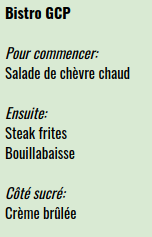

In [0]:
from IPython.display import Image
Image('/content/hybrid_glossaries_example.png')

In [0]:
from IPython.display import Audio
audio = Audio(filename='/content/result.mp3')
display(audio)


In [0]:


# bad translation tool
# translation is done here
# from googletrans import Translator
# translator = Translator()
# data = removeEmoji('अभी भी चल 🤣😊 ही रहा है , बिस्तर पर लेटे लेटे')
# transData.append(translator.translate(data).text)
# print(translator.translate(data).text)   



# transData = []
# for val in clearList:
#     data = removeEmoji(val)
#     transData.append(translator.translate(data).text)

In [0]:
print(translator.translate(text).text)

Creating new dimensions of growth Dev Bhoomi much of the state's foundation day on residents of Uttarakhand Congratulations.


In [0]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] =="./TextToSpeech.json"
from google.cloud import texttospeech

def synthesize_text_with_audio_profile(text, output, effects_profile_id):
    """Synthesizes speech from the input string of text."""
    from google.cloud import texttospeech
# Instantiates a client
client = texttospeech.TextToSpeechClient()

# Set the text input to be synthesized
synthesis_input = texttospeech.types.SynthesisInput(text="")

# Build the voice request, select the language code ("en-US") and the ssml
# voice gender ("neutral")
voice = texttospeech.types.VoiceSelectionParams(
    language_code='en-US',
    ssml_gender=texttospeech.enums.SsmlVoiceGender.NEUTRAL)

# Select the type of audio file you want returned
audio_config = texttospeech.types.AudioConfig(
    audio_encoding=texttospeech.enums.AudioEncoding.MP3)

# Perform the text-to-speech request on the text input with the selected
# voice parameters and audio file type
response = client.synthesize_speech(synthesis_input, voice, audio_config)

# The response's audio_content is binary.
with open('output.mp3', 'wb') as out:
    # Write the response to the output file.
    out.write(response.audio_content)
    print('Audio content written to file "output.mp3"')

Audio content written to file "output.mp3"


In [0]:
# """Translates text into the target language.

# Target must be an ISO 639-1 language code.
# See https://g.co/cloud/translate/v2/translate-reference#supported_languages
# """
# text ='अभी भी चल 🤣😊 ही रहा है , बिस्तर पर लेटे लेटे'


# import os
# # export os.GOOGLE_APPLICATION_CREDENTIALS= "./translate.json"
# os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = "translate.json"

# from google.cloud import translate_v2 as translate
# translate_client = translate.Client()
# target = 'en'
# result = translate_client.translate(
#     text, target_language=target)

# print(u'Text: {}'.format(result['input']))
# print(u'Translation: {}'.format(result['translatedText']))
# print(u'Detected source language: {}'.format(
#     result['detectedSourceLanguage']))

Text: अभी भी चल 🤣😊 ही रहा है , बिस्तर पर लेटे लेटे
Translation: Still going on, lying on the bed
Detected source language: hi
